In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
digits = load_digits()

In [4]:
print("Image Data Shape", digits.data.shape)  # 8 by 8 images
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


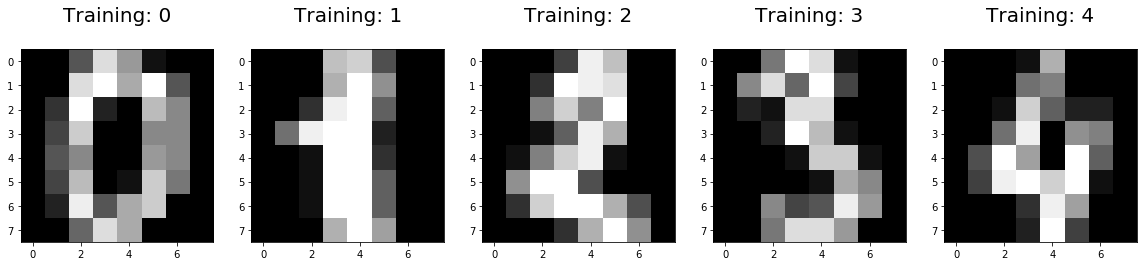

In [6]:
import numpy as np
  
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate (zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %s\n' % label, fontsize = 20)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=.23, random_state=2)

In [9]:
x_train.shape

(1383, 64)

In [11]:
x_test.shape

(414, 64)

In [12]:
y_train.shape

(1383,)

In [13]:
y_test.shape

(414,)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logisticRegr = LogisticRegression()

In [16]:
logisticRegr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
print(logisticRegr.predict(x_test[0].reshape(1,-1)))

[4]


In [18]:
logisticRegr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [19]:
y_pred = logisticRegr.predict(x_test)

In [23]:
from sklearn import metrics

In [25]:
score = logisticRegr.score(x_test,y_test)

In [26]:
score

0.9420289855072463

In [27]:
cm = metrics.confusion_matrix(y_test, y_pred) # Max. numbers should be at the diagonals

In [28]:
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  1,  0,  0,  0,  0,  2,  1],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  3,  2,  0],
       [ 0,  2,  0,  0, 34,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  1,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 35,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  3, 28]], dtype=int64)

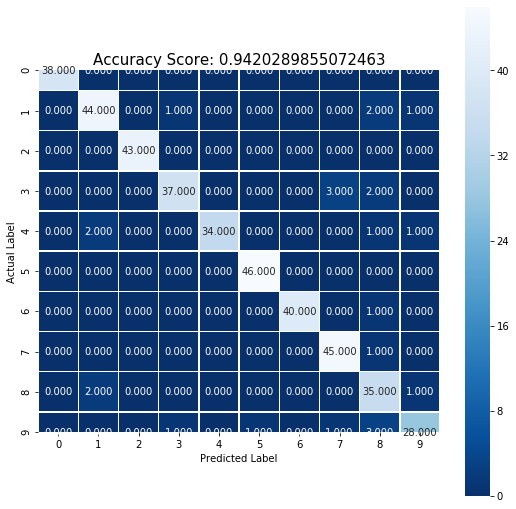

In [30]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot= True, fmt= ".3f", linewidth=.5, square=True, cmap = 'Blues_r');
plt.ylabel('Actual Label');
plt.xlabel('Predicted Label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size=15);

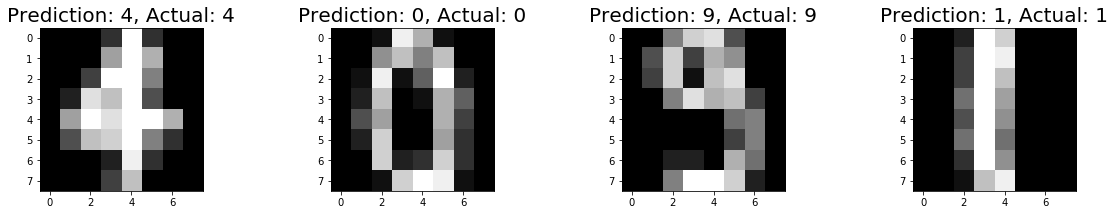

In [33]:
index = 0
classifiedIndex = []
for predict, actual in zip(y_pred,y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index += 1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate (classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex+1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap = plt.cm.gray)
    plt.title("Prediction: {}, Actual: {}".format(y_pred[wrong],y_test[wrong]),fontsize=20)